# Read clean CSV file data

In [1]:
import pandas as pd
job_data = pd.read_csv('linkedin_job_postings.csv')
job_data

,job_title,company_name,job_city,job_state,job_skills,job_level,job_type,job_post_link,last_modified_date,first_seen,job_country
0,Assistant Nurse Manager (RN) Psychiatry Frankl...,MedStar Health,Baltimore,MD,"Nursing, Leadership, Management, Quality Assur...",Mid senior,Onsite,https://www.linkedin.com/jobs/view/assistant-n...,24/01/19,13-01-2024,United States
1,Executive Chef,Maggiano's Little Italy,King of Prussia,PA,"Culinary Team, Flawless Execution, ScratchBase...",Mid senior,Onsite,https://www.linkedin.com/jobs/view/executive-c...,24/01/19,12-01-2024,United States
2,Sales Lead COM,Republic National Distributing Company,Grand Prairie,TX,"Consultative selling, Customer service, Produc...",Associate,Onsite,https://www.linkedin.com/jobs/view/sales-lead-...,24/01/21,14-01-2024,United States
3,Senior Content Marketing Manager,Quartile,New York,NY,"Content Development, Digital Marketing, eComme...",Mid senior,Onsite,https://www.linkedin.com/jobs/view/senior-cont...,24/01/19,16-01-2024,United States
4,Residential Counselor,InVision Human Services,Northampton,PA,"Social services, Regulatory compliance, Medica...",Mid senior,Onsite,https://www.linkedin.com/jobs/view/residential...,24/01/19,13-01-2024,United States
...,...,...,...,...,...,...,...,...,...,...,...
511093,Production Planner,"BlueScope Buildings North America, Inc.",Middletown,OH,"Inventory Management, Production Planning, Sch...",Associate,Onsite,https://www.linkedin.com/jobs/view/production-...,24/01/19,14-01-2024,United States
511094,Registered Nurse,Sutter Health,Ewa Beach,HI,"Nursing theories, Medical terminology, Anatomy...",Mid senior,Onsite,https://www.linkedin.com/jobs/view/registered-...,24/01/19,14-01-2024,United States
511095,Juice Barista Part Time,WIS International,Windsor Heights,IA,"Retail, Fastpaced, Customer interaction, Food ...",Mid senior,Onsite,https://www.linkedin.com/jobs/view/juice-baris...,24/01/19,14-01-2024,United States
511096,Banquet and Outlets Manager-Kimpton Hotel Font...,Kimpton Hotels & Restaurants,New Orleans,LA,"Banquet Operations Management, Guest Satisfact...",Mid senior,Onsite,https://www.linkedin.com/jobs/view/banquet-and...,24/01/19,14-01-2024,United States


# K-Means Clustering

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(job_data['job_title'].values)
print(X.shape)
analyze = vectorizer.build_analyzer()
features = vectorizer.get_feature_names_out() 

(511098, 48755)


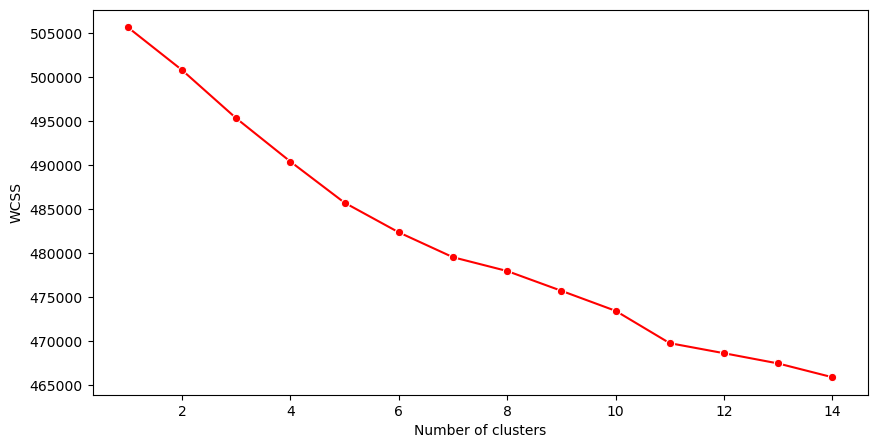

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=600, n_init=1)
    kmeans.fit(X)  # Assuming X contains your data
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=wcss, marker='o', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

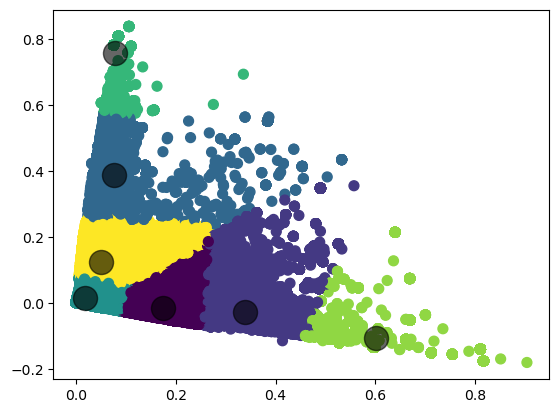

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Fit KMeans on the reduced data
k = 7
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=1, random_state=42)

prediction = kmeans.fit_predict(X_svd)

terms = vectorizer.get_feature_names_out() 

# Plot the clustered data
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=prediction, s=50, cmap='viridis')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)

plt.show()


In [7]:
import numpy as np
import pandas as pd
from scipy.sparse import issparse

def get_top_keywords(data, clusters, labels, n_terms, batch_size=1000):
    unique_clusters = np.unique(clusters)
    
    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        num_data_points = len(cluster_indices)
        
        print('\nCluster {}:'.format(cluster))
        print('Number of data points in this cluster:', num_data_points)
        
        batch_means = []
        for i in range(0, num_data_points, batch_size):
            batch_indices = cluster_indices[i:i+batch_size]
            if issparse(data):
                cluster_data = data[batch_indices].toarray()
            else:
                cluster_data = data[batch_indices]
            batch_means.append(np.mean(cluster_data, axis=0))
        
        cluster_mean = np.mean(batch_means, axis=0)        
        top_indices = np.argsort(cluster_mean)[-n_terms:]
        top_keywords = [labels[i] for i in top_indices]
        print('Top keywords:', top_keywords)


get_top_keywords(X, prediction, features, 10)



Cluster 0:
Number of data points in this cluster: 56535
Top keywords: ['nurse', 'salon', 'case', 'store', 'project', 'administrative', 'executive', 'account', 'assistant', 'manager']

Cluster 1:
Number of data points in this cluster: 32639
Top keywords: ['senior', 'store', 'accounting', 'executive', 'account', 'construction', 'restaurant', 'project', 'assistant', 'manager']

Cluster 2:
Number of data points in this cluster: 15363
Top keywords: ['advisor', 'technician', 'pt', 'ft', 'representative', 'customer', 'lead', 'associate', 'service', 'sales']

Cluster 3:
Number of data points in this cluster: 318676
Top keywords: ['time', 'technologist', 'health', 'technician', 'analyst', 'specialist', 'registered', 'supervisor', 'rn', 'nurse']

Cluster 4:
Number of data points in this cluster: 5235
Top keywords: ['associate', 'sales', 'part', 'time', 'or', 'full', 'lead', 'service', 'representative', 'customer']

Cluster 5:
Number of data points in this cluster: 12938
Top keywords: ['restaura

In [ ]:
label = []
print(len(job_data['job_title'].values))
for title in job_data['job_title'].values:
    vec = vectorizer.transform([title])  # Transform job title to high-dimensional space
    vec_svd = svd.transform(vec)  # Transform to reduced two-dimensional space
    pred = kmeans.predict(vec_svd)# Predict cluster label
    if pred == 1:
        label.append("Technical Professional")
    elif pred == 5:
        label.append("Restaurant Management")
    elif pred == 3:
        label.append("Sales Lead or Customer Service Associate")
    elif pred == 6:
        label.append("Business Administration")
    elif pred == 4:
        label.append("Healthcare Worker")
    elif pred == 2:
        label.append("Customer Service Specialist")
    elif pred == 0:
        label.append("Executive Dean Healthcare")

job_data['Label'] = label
job_data.head(5)

511098


# Splitting Train and Test Data

In [75]:
from sklearn.model_selection import train_test_split

jobSkills = []
for i in job_data['job_skills']:
    jobSkills.append(i.lower())

Xclass = vectorizer.fit_transform(jobSkills)

X_train, X_test, y_train, y_test = train_test_split(Xclass,job_data['Label'],test_size=0.2,random_state=42)

# 1. Logistic Regression

Text(0, 0.5, 'Accuracy')

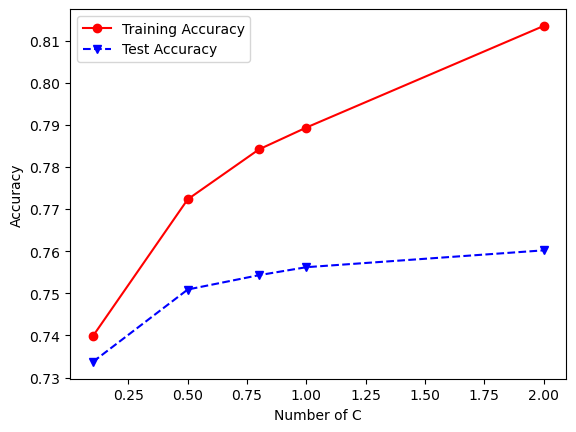

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt

Cparamrange = [0.1, 0.5, 0.8, 1,2]
trainAcc = []
testAcc = []

for i in Cparamrange:
    lrg = LogisticRegression(penalty = 'l2', C=i, random_state = 42, max_iter=1000)
    lrg.fit(X_train, y_train)
    lrg_predtrain = lrg.predict(X_train)
    lrg_predtest = lrg.predict(X_test)
    trainacc = accuracy_score(y_train, lrg_predtrain)
    testacc = accuracy_score(y_test, lrg_predtest)
    trainAcc.append(trainacc)
    testAcc.append(testacc)
    
plt.plot(Cparamrange, trainAcc, 'ro-', Cparamrange, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of C')
plt.ylabel('Accuracy')

In [15]:
lrg = LogisticRegression(penalty = 'l2', C=0.1, random_state = 42)
lrg.fit(X_train,y_train)
lrg_pred = lrg.predict(X_test)
lrg_acc = accuracy_score(y_test,lrg_pred)
print("Accuracy of Logistic Regression: " + str(lrg_acc))
print(classification_report(y_test, lrg_pred))

Accuracy of Logistic Regression: 0.7337
                                          precision    recall  f1-score   support

                 Business Administration       0.60      0.12      0.19       361
             Customer Service Specialist       0.81      0.28      0.42       120
               Executive Dean Healthcare       0.40      0.02      0.04       909
                       Healthcare Worker       0.75      0.99      0.85      7117
                   Restaurant Management       0.70      0.05      0.09       146
Sales Lead or Customer Service Associate       0.72      0.17      0.28       618
                  Technical Professional       0.35      0.11      0.17       729

                                accuracy                           0.73     10000
                               macro avg       0.62      0.25      0.29     10000
                            weighted avg       0.68      0.73      0.65     10000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

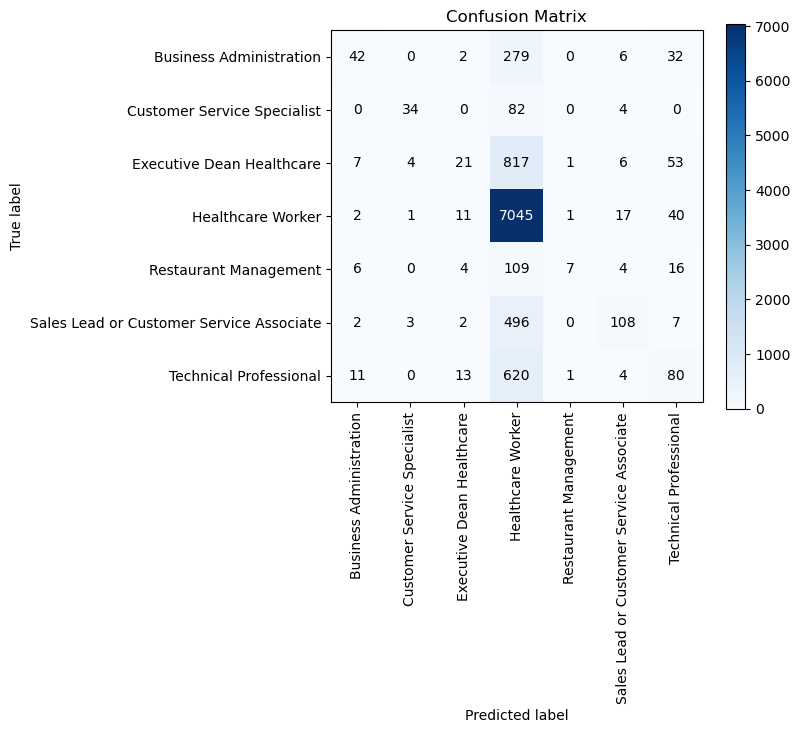

In [16]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    lrg_pred,
    x_tick_rotation=90,
    figsize=(6,5))

# 2. Decision Tree

Text(0, 0.5, 'Accuracy')

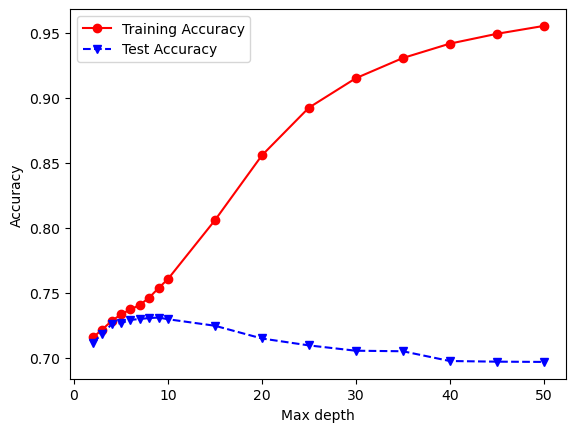

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAccuracy = np.zeros(len(maxdepths))

testAccuracy = np.zeros(len(maxdepths))

index= 0

for depth in maxdepths: 
    clf2 = DecisionTreeClassifier(max_depth=depth) 
    clf2 = clf2.fit(X_train, y_train) 
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(X_test) 
    trainAccuracy[index] = accuracy_score(y_train, Y_predTrain) 
    testAccuracy[index] = accuracy_score(y_test, Y_predTest) 
    index += 1 
    
plt.plot(maxdepths, trainAccuracy, 'ro-', maxdepths, testAccuracy,'bv--') 
plt.legend(['Training Accuracy', 'Test Accuracy']) 
plt.xlabel('Max depth') 
plt.ylabel('Accuracy')

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Decision Tree classifier with max_depth=10
dt = DecisionTreeClassifier(max_depth=10)

# Fit the classifier on the training data
dt2 = dt.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt2.predict(X_test)

# Calculate accuracy
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision tree:", str(dt_acc))

# Print classification report
print(classification_report(y_test, dt_pred))

Accuracy of Decision tree: 0.7299
                                          precision    recall  f1-score   support

                 Business Administration       0.42      0.20      0.27       361
             Customer Service Specialist       0.81      0.32      0.46       120
               Executive Dean Healthcare       0.32      0.06      0.11       909
                       Healthcare Worker       0.76      0.97      0.85      7117
                   Restaurant Management       0.30      0.13      0.18       146
Sales Lead or Customer Service Associate       0.86      0.17      0.29       618
                  Technical Professional       0.29      0.09      0.14       729

                                accuracy                           0.73     10000
                               macro avg       0.54      0.28      0.33     10000
                            weighted avg       0.67      0.73      0.66     10000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

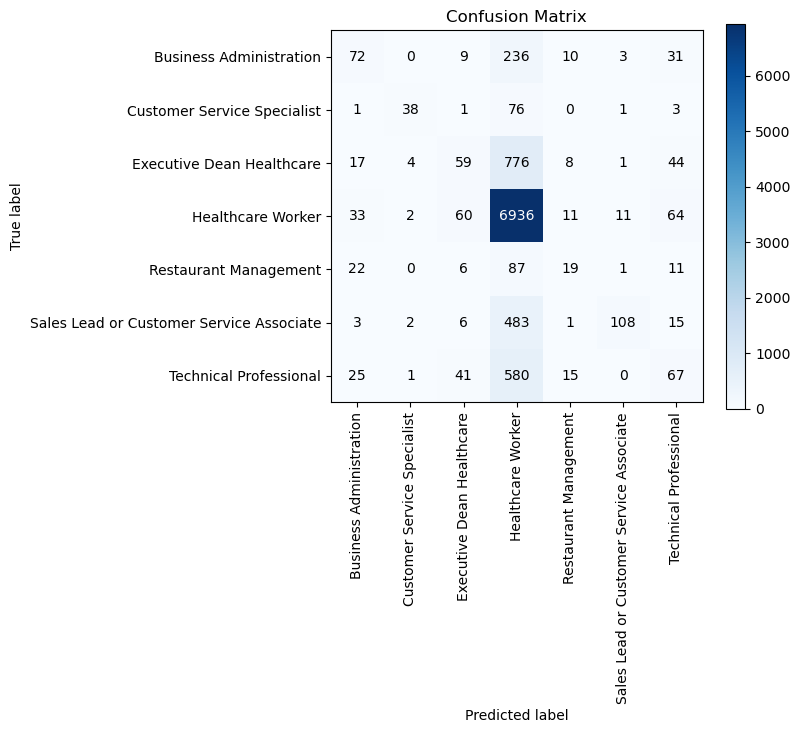

In [19]:
skplt.metrics.plot_confusion_matrix(y_test,dt_pred,x_tick_rotation=90,figsize=(6,5))

# 3. Naive Bayes Classification

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=100)  # You can adjust the number of components as needed
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Create and fit Gaussian Naive Bayes model
model_nb = GaussianNB()
nb_fit = model_nb.fit(X_train_svd, y_train)

# Predictions on training and testing data
nb_pred_train = model_nb.predict(X_train_svd)
nb_pred_test = model_nb.predict(X_test_svd)

# Calculate accuracies
train_acc = accuracy_score(y_train, nb_pred_train)
test_acc = accuracy_score(y_test, nb_pred_test)

print("Accuracy of Naive Bayes: " + str(test_acc))
print(classification_report(y_test, nb_pred_test))

Accuracy of Naive Bayes: 0.6324
                                          precision    recall  f1-score   support

                 Business Administration       0.14      0.29      0.19       361
             Customer Service Specialist       0.30      0.58      0.40       120
               Executive Dean Healthcare       0.28      0.07      0.12       909
                       Healthcare Worker       0.81      0.80      0.80      7117
                   Restaurant Management       0.15      0.42      0.23       146
Sales Lead or Customer Service Associate       0.28      0.33      0.31       618
                  Technical Professional       0.23      0.21      0.22       729

                                accuracy                           0.63     10000
                               macro avg       0.31      0.39      0.32     10000
                            weighted avg       0.64      0.63      0.63     10000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

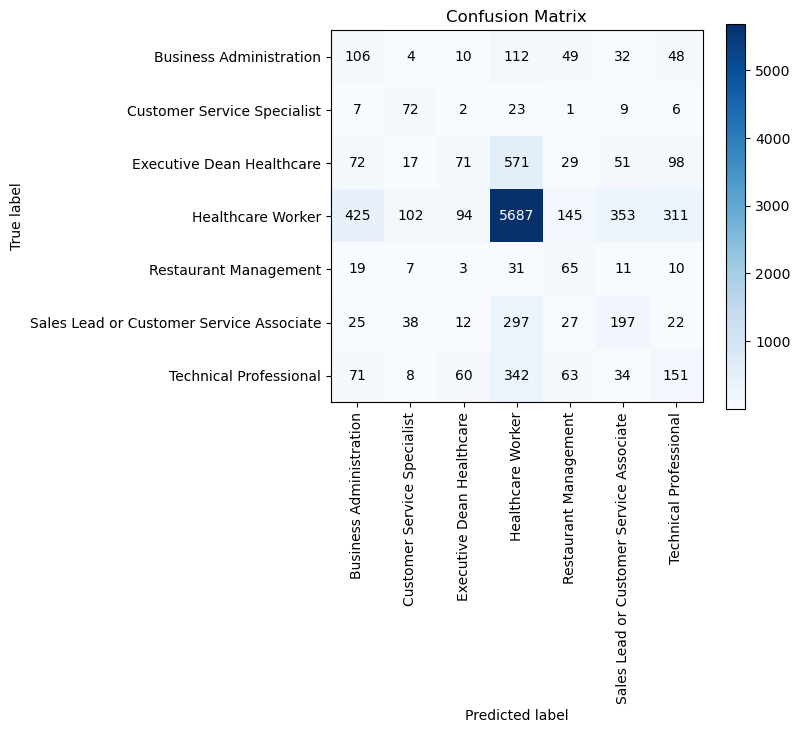

In [21]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    nb_pred_test,
    x_tick_rotation=90,
    figsize=(6,5))

# 4. Random Forest

Text(0, 0.5, 'Accuracy')

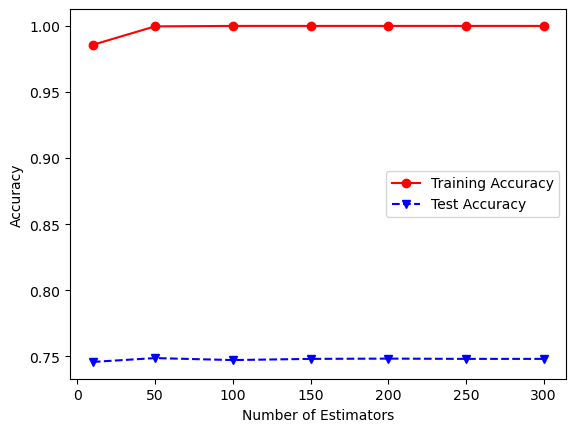

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

n_estimators = [10, 50, 100, 150, 200, 250, 300]
trainAcc = []
testAcc = []

for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_fit = model_rf.fit(X_train, y_train)
    rf_pred_train = model_rf.predict(X_train)
    rf_pred_test = model_rf.predict(X_test)
    train_acc = accuracy_score(y_train, rf_pred_train)
    test_acc = accuracy_score(y_test, rf_pred_test)
    trainAcc.append(train_acc)
    testAcc.append(test_acc)
    
plt.plot(n_estimators, trainAcc, 'ro-', n_estimators, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

In [23]:
# Selecting the best performing number of estimators
best_n_estimators = n_estimators[testAcc.index(max(testAcc))]

# Training the Random Forest with the best number of estimators
rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_fit = rf.fit(X_train, y_train)
rf_pred = rf_fit.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Accuracy of Random Forest: " + str(rf_acc))
print(classification_report(y_test, rf_pred))

Accuracy of Random Forest: 0.7488
                                          precision    recall  f1-score   support

                 Business Administration       0.79      0.19      0.31       361
             Customer Service Specialist       0.91      0.49      0.64       120
               Executive Dean Healthcare       0.60      0.05      0.09       909
                       Healthcare Worker       0.75      1.00      0.85      7117
                   Restaurant Management       0.75      0.16      0.27       146
Sales Lead or Customer Service Associate       0.98      0.21      0.35       618
                  Technical Professional       0.63      0.08      0.14       729

                                accuracy                           0.75     10000
                               macro avg       0.77      0.31      0.38     10000
                            weighted avg       0.74      0.75      0.67     10000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

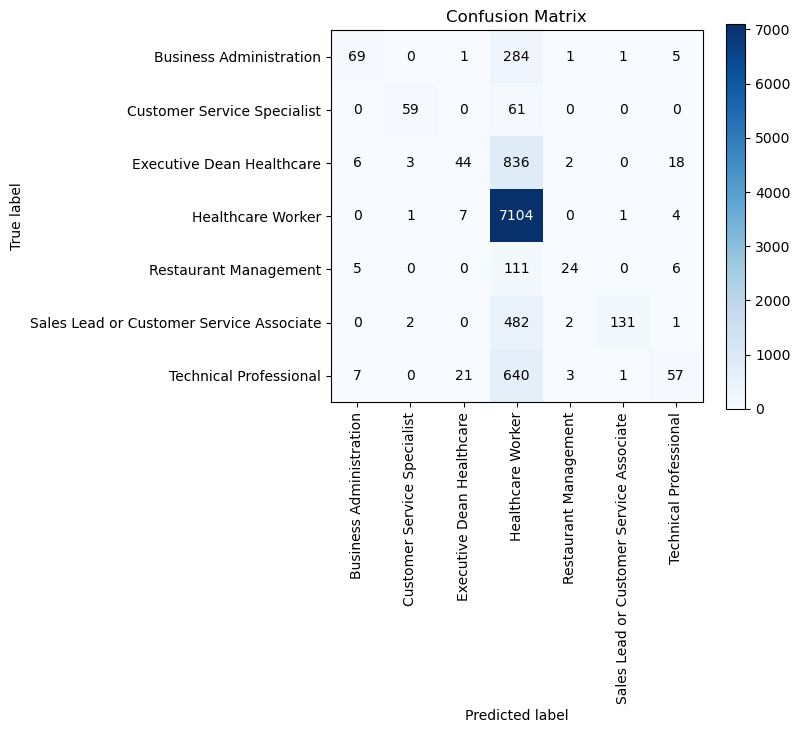

In [24]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    rf_pred,
    x_tick_rotation=90,
    figsize=(6,5))

# 5. k-NN Classification

Text(0, 0.5, 'Accuracy')

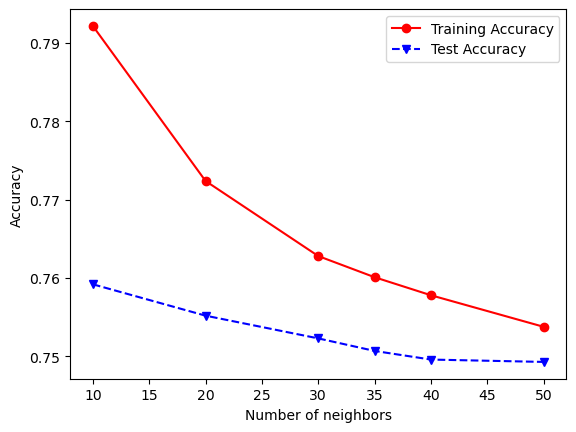

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

numNeighbors = [10, 20, 30, 35, 40, 50]
trainAcc = []
testAcc = []


for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))


    
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [27]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 50, metric='minkowski', p=2)
knn.fit(X_train, y_train)
knn_pred = clf1.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("Accuracy of KNN: " + str(knn_acc))
print(classification_report(y_test, knn_pred))

Accuracy of KNN: 0.7493
                                          precision    recall  f1-score   support

                 Business Administration       0.62      0.22      0.33       361
             Customer Service Specialist       0.58      0.55      0.57       120
               Executive Dean Healthcare       0.46      0.07      0.12       909
                       Healthcare Worker       0.77      0.98      0.86      7117
                   Restaurant Management       0.62      0.23      0.33       146
Sales Lead or Customer Service Associate       0.76      0.23      0.35       618
                  Technical Professional       0.44      0.15      0.22       729

                                accuracy                           0.75     10000
                               macro avg       0.61      0.35      0.40     10000
                            weighted avg       0.70      0.75      0.69     10000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

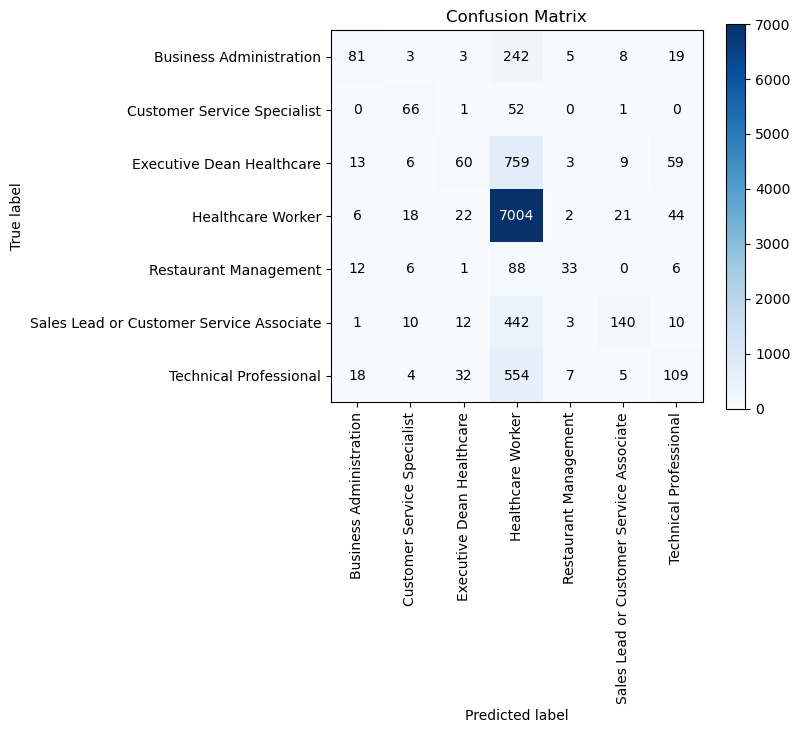

In [28]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
y_test,
knn_pred,
x_tick_rotation=90,
figsize=(6,5))

# 6. Support Vector Machine

Text(0, 0.5, 'Accuracy')

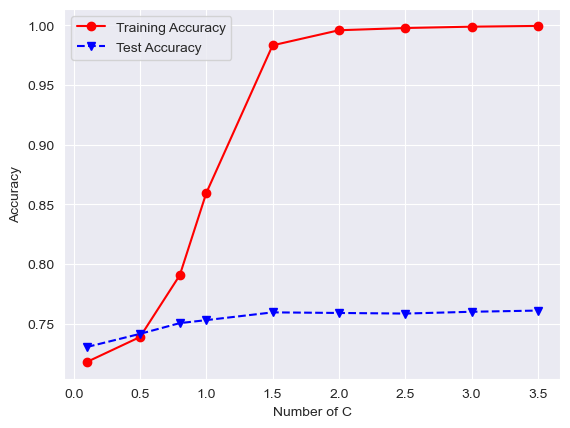

In [86]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt

Csvm = [0.1,0.5,0.8,1,1.5,2,2.5,3,3.5] 
trainAcc = []
testAcc = []

for i in Csvm:
    modelsvm = svm.SVC(C=i, gamma=1, kernel= 'rbf')
    svmfit = modelsvm.fit(X_train, y_train)
    svm_predtrain = modelsvm.predict(X_train)
    svm_predtest = modelsvm.predict(X_test)
    trainacc = accuracy_score(y_train, svm_predtrain)
    testacc = accuracy_score(y_test, svm_predtest)
    trainAcc.append(trainacc)
    testAcc.append(testacc)
    
plt.plot(Csvm, trainAcc, 'ro-', Csvm, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of C')
plt.ylabel('Accuracy')

In [87]:
svm = svm.SVC(C=5, gamma=1, kernel= 'rbf', probability=True)
svmfit = svm.fit(X_train,y_train)
svm_pred = svmfit.predict(X_test)
svm_acc = accuracy_score(y_test,svm_pred)
print("Accuracy of SVM: " + str(svm_acc))
print(classification_report(y_test, svm_pred))

Accuracy of SVM: 0.76
                                          precision    recall  f1-score   support

                 Business Administration       0.45      0.13      0.21        67
             Customer Service Specialist       0.90      0.31      0.46        29
               Executive Dean Healthcare       0.43      0.09      0.14       172
                       Healthcare Worker       0.78      0.98      0.87      1457
                   Restaurant Management       0.43      0.23      0.30        26
Sales Lead or Customer Service Associate       0.79      0.25      0.38       104
                  Technical Professional       0.36      0.14      0.21       145

                                accuracy                           0.76      2000
                               macro avg       0.59      0.31      0.37      2000
                            weighted avg       0.71      0.76      0.70      2000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

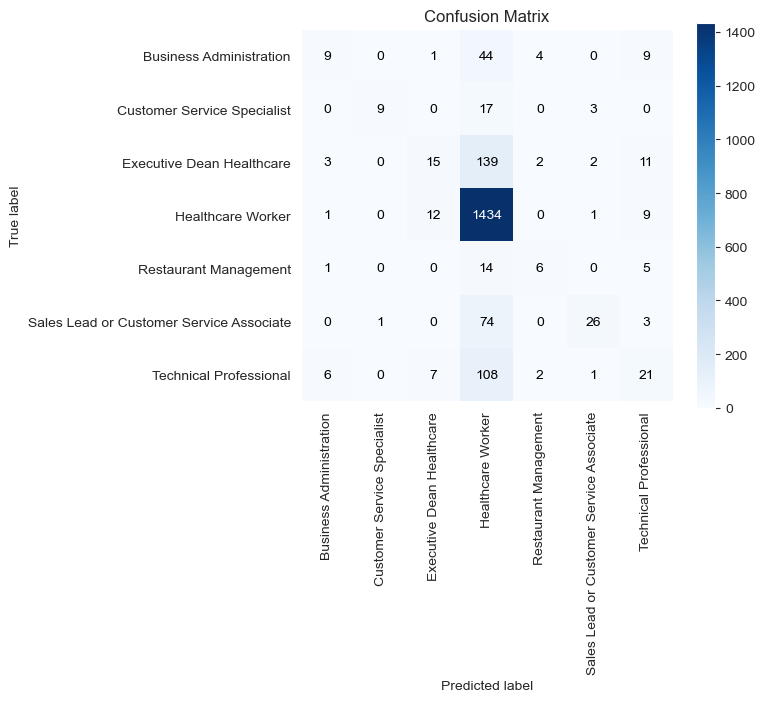

In [89]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test,
    svm_pred,
    x_tick_rotation=90,
    figsize=(6,5))

# 7. XGBoost 

In [31]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Declare parameters
params = {
    'objective': 'multi:softmax',  # Softmax objective for multiclass classification
    'num_class': 7,  # Number of classes in your dataset
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 0.05
}

# Define a list of values for num_rounds
num_rounds_list = [100, 500, 700, 800]

# Initialize lists to store training and test accuracies
train_accuracy = []
xgb_accuracy = []


# Iterate through each value of num_rounds
for num_rounds in num_rounds_list:
    # Instantiate the classifier
    xgb_clf = XGBClassifier(**params, n_estimators=num_rounds)
    
    # Fit the classifier to the training data
    xgb_clf.fit(X_train, y_train_encoded)
    
    # Make predictions on training and test data
    train_pred = xgb_clf.predict(X_train)
    xgb_pred = xgb_clf.predict(X_test)
    
    # Calculate accuracy on training and test data
    train_acc = np.mean(train_pred == y_train_encoded)
    xgb_acc = np.mean(xgb_pred == y_test_encoded)
    
    # Append accuracies to the lists
    train_accuracy.append(train_acc)
    xgb_accuracy.append(xgb_acc)


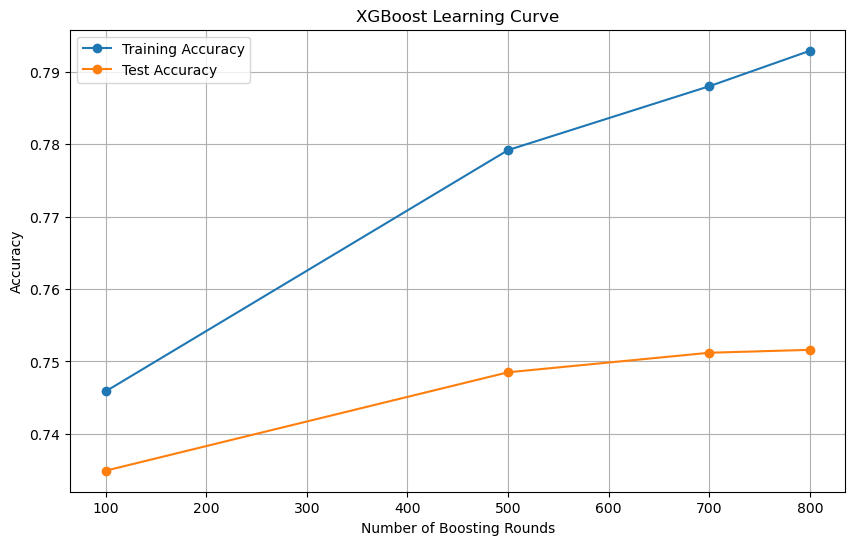

In [32]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(num_rounds_list, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(num_rounds_list, xgb_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_acc = accuracy_score(y_test_encoded, xgb_pred)
print("Accuracy of XG-Boost: " + str(xgb_acc))
print(classification_report(y_test_encoded, xgb_pred))


Accuracy of XG-Boost: 0.7516
              precision    recall  f1-score   support

           0       0.53      0.22      0.32       361
           1       0.81      0.52      0.63       120
           2       0.41      0.10      0.16       909
           3       0.78      0.98      0.87      7117
           4       0.46      0.36      0.40       146
           5       0.79      0.24      0.37       618
           6       0.42      0.16      0.23       729

    accuracy                           0.75     10000
   macro avg       0.60      0.37      0.43     10000
weighted avg       0.70      0.75      0.70     10000



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

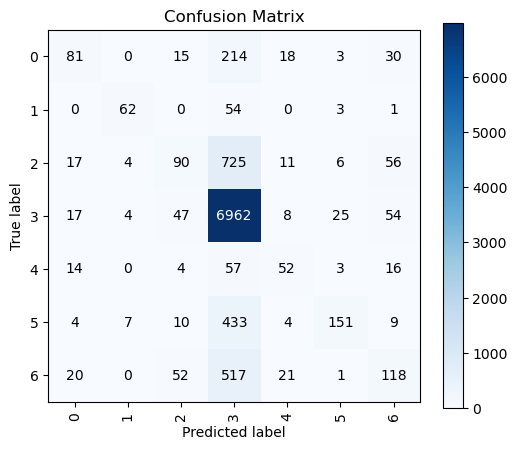

In [34]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
y_test_encoded,
xgb_pred,
x_tick_rotation=90,
figsize=(6,5))

# Accuracy

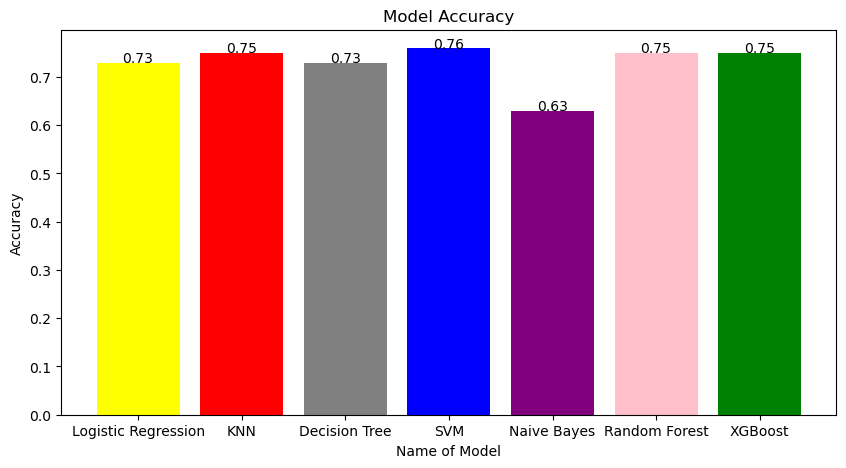

In [70]:
def addlabels (x, y):
    for i in range (len(x)):
        plt.text ( i, y[i] , y[i] , ha ='center')

## initializing the Labels and model accuracy. The model accuracy round up to 2dp 
labels=("Logistic Regression", "KNN", "Decision Tree", "SVM","Naive Bayes","Random Forest","XGBoost") 
modelsAccuracy = [round(lrg_acc, 2), round(knn_acc, 2), 
                  round (dt_acc ,2) , round(svm_acc, 2),
                  round(test_acc, 2), round(rf_acc, 2),
                  round(xgb_acc, 2)]

#setting figure size by using figure() function
plt.figure(figsize=(10, 5))

#making the bar chart on the data 
plt.bar(labels, modelsAccuracy,color=['yellow', 'red', 'grey', 'blue', 'purple', 'pink', 'green']) 

#calling the function to add value Labels 
addlabels(labels, modelsAccuracy)

#giving title to the plot
plt.title("Model Accuracy")

plt.xlabel("Name of Model")
plt.ylabel("Accuracy")

plt.show()

In [78]:
from sklearn.metrics import roc_curve
##predict probabilities

lrg_prob = lrg.predict_proba(X_test) [::,1]
knn_prob=knn.predict_proba(X_test) [::,1]
dt_prob=dt.predict_proba(X_test) [::,1]
svm_prob=svm.predict_proba(X_test) [::,1]
rf_prob=rf.predict_proba(X_test) [::,1]
xgb_prob=xgb_clf.predict_proba(X_test) [::,1]
nb_prob=model_nb.predict_proba(X_test_svd) [::,1]

#roc curve for models

fprlrg, tprlrg, threshlrg=roc_curve(y_test, lrg_prob, pos_label='Business Administration')
fprknn, tprknn, threshknn=roc_curve(y_test, knn_prob, pos_label='Business Administration')

fprdt, tprdt, threshdt=roc_curve(y_test, dt_prob, pos_label='Business Administration') 
fprsvm, tprsvm, threshsvm=roc_curve(y_test, svm_prob, pos_label='Business Administration')
fprrf, tprrf, threshrf=roc_curve(y_test, rf_prob, pos_label='Business Administration')
fprnb, tprnb, threshnb=roc_curve(y_test, nb_prob, pos_label='Business Administration')
fprxgb, tprxgb, threshxgb=roc_curve(y_test, xgb_prob, pos_label='Business Administration')

##roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]

# ROC curve where TPR = FPR
P_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label='Business Administration')

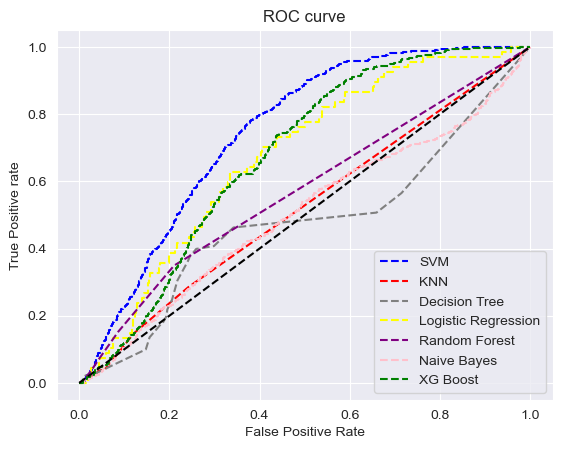

In [95]:
# Set seaborn style
sns.set_style('darkgrid')
#plot roc curves

plt.plot(fprlrg, tprlrg, linestyle='--',color='yellow', label='Logistic Regression')

plt.plot(fprknn, tprknn, linestyle='--',color='red', label='KNN')
plt.plot(fprdt, tprdt, linestyle='--',color='grey', label='Decision Tree')

plt.plot(fprsvm, tprsvm, linestyle='--',color='blue', label='SVM')
plt.plot(fprrf, tprrf, linestyle='--',color='purple', label='Random Forest')
plt.plot(fprnb, tprnb, linestyle='--',color='pink', label='Naive Bayes')
plt.plot(fprxgb, tprxgb, linestyle='--',color='green', label='XG Boost')

plt.plot(P_fpr, p_tpr, linestyle='--', color='Black')

#title

plt.title('ROC curve') 

# x Label

plt.xlabel('False Positive Rate')

#y Label

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi = 300 )

plt.show()

# Best model implementation with User input

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

userInput = input("Enter your skills: ")

pred = vectorizer.transform([userInput.lower()])

output = svm.predict(pred)

print("You may look into " + output[0] + " jobs")

print("Here is a list of jobs that is under "+ output[0])
cos=[]
labelData = job_data[job_data['Label'] == output[0]].copy()

for index, row in labelData.iterrows(): 
    skills= [row['job_skills']]

    skillVec = vectorizer.transform(skills)

    cos_lib=cosine_similarity (skillVec, pred)

    cos.append( cos_lib[0][0])

labelData.loc[:, 'cosine_similarity'] = cos

#Display top 5 recommendation from cosine similarity

top_5 =labelData.sort_values('cosine_similarity', ascending=False) [['Label', 'job_title', 'company_name', 'job_city', 'job_state', 'job_skills',
       'job_level', 'job_post_link', 'last_modified_date',
       'first_seen', 'job_country']]

top_5.head(5)

Enter your skills: health, nurse
You may look into Healthcare Worker jobs
Here is a list of jobs that is under Healthcare Worker


,Label,job_title,company_name,job_city,job_state,job_skills,job_level,job_post_link,last_modified_date,first_seen,job_country
9154,Healthcare Worker,Travel RN - School RN,"The Stepping Stones Group, LLC",Phoenix,AZ,"School Nurse, Pediatric Nursing, Registered Nu...",Mid senior,https://www.linkedin.com/jobs/view/travel-rn-s...,24/01/19,14-01-2024,United States
2866,Healthcare Worker,Registered Nurse – Emergency Room - Travel - (...,TravelNurseSource,Southaven,MS,"Emergency Room Nurse, Trauma Nurse, Acute Care...",Mid senior,https://www.linkedin.com/jobs/view/registered-...,24/01/19,13-01-2024,United States
6474,Healthcare Worker,RN - Health Educator,Spectrum Healthcare Resources,San Diego,CA,"Health Promotion, Health Education, Program De...",Mid senior,https://www.linkedin.com/jobs/view/rn-health-e...,24/01/19,13-01-2024,United States
4705,Healthcare Worker,Occupational Health Nurse,Jobot,Sturgis,MI,"Occupational Health Nursing, Registered Nurse ...",Mid senior,https://www.linkedin.com/jobs/view/occupationa...,24/01/19,16-01-2024,United States
5959,Healthcare Worker,"Advanced Practice Nurse, Pediatric Psychiatry",Saint Anthony Hospital,Chicago,IL,"Psychotherapy, Behavioral health home, Advance...",Mid senior,https://www.linkedin.com/jobs/view/advanced-pr...,24/01/19,16-01-2024,United States
